In [ ]:
import numpy as np
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import sklearn.metrics as metrics

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('D:/Năm 3/Học kỳ 2/ThucHanhPTDK/Holt winters/NFLX.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
df.isnull().sum()

Open    0
dtype: int64

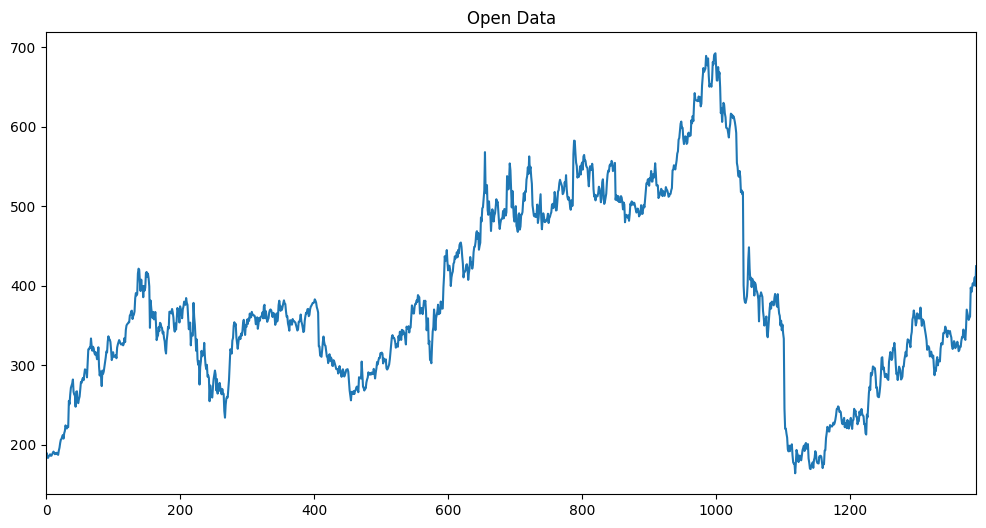

In [ ]:
df['Open'].plot(figsize=(12,6),title='Open Data').autoscale(axis='x',tight=True)

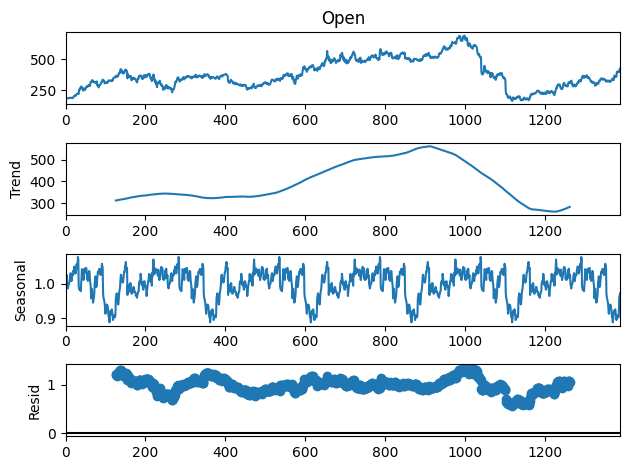

In [ ]:
decompose_result = seasonal_decompose(df['Open'],model='multiplicative', period=252)
decompose_result.plot();

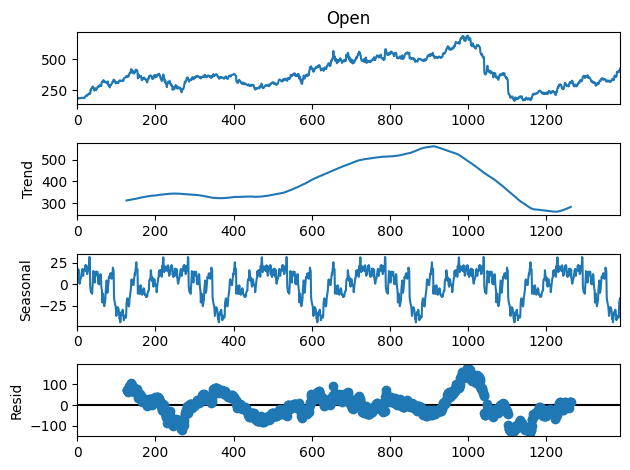

In [ ]:
decompose_result = seasonal_decompose(df['Open'],model='additive', period=252)
decompose_result.plot();

In [ ]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Train the Holt Winters model (Simple exponential smoothing)
model = SimpleExpSmoothing(train_data).fit()

In [ ]:
# Train the Holt Winters model (Double exponential smoothing)
model = ExponentialSmoothing(train_data, trend='add').fit()

In [ ]:
# Train the Holt Winters model (Triple exponential smoothing)
model = ExponentialSmoothing(train_data, trend='add',
                             seasonal='add',
                              seasonal_periods=252).fit()

In [ ]:
Predictions=model.forecast(test_size)

In [ ]:
Pre_val=model.predict(len(df)-val_size, len(df)-1)

In [ ]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(len(df), len(df)+30-1)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
1389    633.037257
1390    633.037257
1391    633.037257
1392    633.037257
1393    633.037257
1394    633.037257
1395    633.037257
1396    633.037257
1397    633.037257
1398    633.037257
1399    633.037257
1400    633.037257
1401    633.037257
1402    633.037257
1403    633.037257
1404    633.037257
1405    633.037257
1406    633.037257
1407    633.037257
1408    633.037257
1409    633.037257
1410    633.037257
1411    633.037257
1412    633.037257
1413    633.037257
1414    633.037257
1415    633.037257
1416    633.037257
1417    633.037257
1418    633.037257
dtype: float64


In [ ]:
y_val = np.array(val_data['Open'])
y_test = np.array(test_data['Open'])

In [ ]:
# 7. Đánh giá độ chính xác validate, test
print("Testing Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, Predictions), 4))
print("Testing Mean Squared Error:", round(metrics.mean_squared_error(y_test, Predictions), 4))
print("Testing Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, Predictions)), 4))

print("Validation Mean Absolute Error:", round(metrics.mean_absolute_error(y_val, Pre_val), 4))
print("Validation Mean Squared Error:", round(metrics.mean_squared_error(y_val, Pre_val), 4))
print("Validation Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_val, Pre_val)), 4))

Testing Mean Absolute Error: 284.6588
Testing Mean Squared Error: 106095.5903
Testing Root Mean Squared Error: 325.7232
Validation Mean Absolute Error: 303.1398
Validation Mean Squared Error: 92803.5197
Validation Root Mean Squared Error: 304.6367


<Axes: >

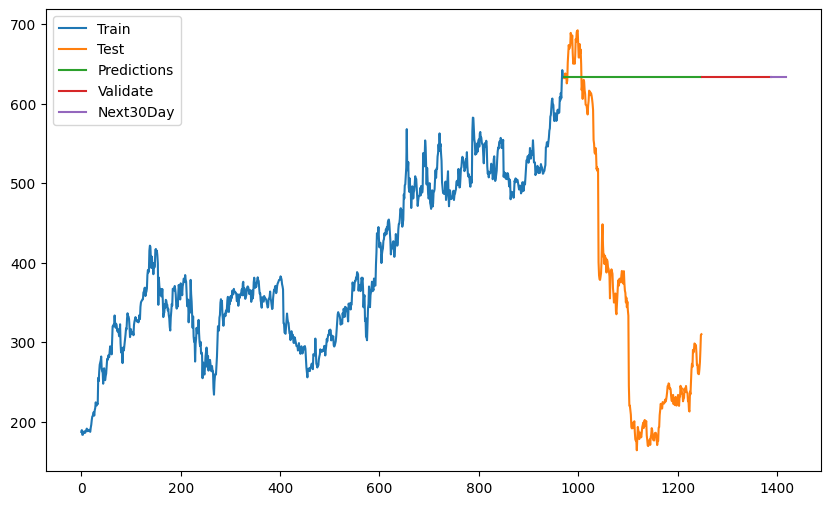

In [ ]:
train_data['Open'].plot(legend=True, label='Train',figsize=(10,6))
test_data['Open'].plot(legend=True, label='Test')
Predictions.plot(legend=True, label='Predictions')
Pre_val.plot(legend=True, label='Validate')
y_next_30_days.plot(legend=True, label='Next30Day')
#test_pred_add.plot(legend=True, label='predicted_test_add')

In [ ]:
print(model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Open   No. Observations:                  972
Model:             SimpleExpSmoothing   SSE                          98263.543
Optimized:                       True   AIC                           4490.803
Trend:                           None   BIC                           4500.562
Seasonal:                        None   AICC                          4490.844
Seasonal Periods:                None   Date:                 Mon, 19 Jun 2023
Box-Cox:                        False   Time:                         11:27:31
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9362856                alpha                 True
initial_level              187.11723                